Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch as t
import scipy as sci
import cv2

In [ ]:
import math

from PIL import Image
import requests
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import ipywidgets as widgets
from IPython.display import display, clear_output

import torch
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T
torch.set_grad_enabled(False);

Load DETR model with pretrained weights

In [ ]:
model = t.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained  = True)
model = model.cuda()

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_main


Train Model

In [ ]:
!python -m torch.distributed.launch --nproc_per_node=1 --use_env /content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/main.py --coco_path /content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco --output_dir /content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/savedWeights --resume /content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/savedWeights/checkpoint.pth --epochs 500

/usr/local/lib/python3.7/dist-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
| distributed init (rank 0): env://
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedfor

Evaluate Model

In [ ]:
!python /content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/main.py --batch_size 2 --no_aux_loss --eval --resume /content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/savedWeights/checkpoint.pth --coco_path /content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco

Not using distributed mode
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=False, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=300, eval=True, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=100, num_workers=2, output_dir='', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/savedWeights/checkpoint.pth', seed=4

Display Annotations

In [ ]:
import torch
PATH = ('/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/savedWeights/checkpoint.pth')
model.load_state_dict(torch.load(PATH), strict=False)

_IncompatibleKeys(missing_keys=['transformer.encoder.layers.0.self_attn.in_proj_weight', 'transformer.encoder.layers.0.self_attn.in_proj_bias', 'transformer.encoder.layers.0.self_attn.out_proj.weight', 'transformer.encoder.layers.0.self_attn.out_proj.bias', 'transformer.encoder.layers.0.linear1.weight', 'transformer.encoder.layers.0.linear1.bias', 'transformer.encoder.layers.0.linear2.weight', 'transformer.encoder.layers.0.linear2.bias', 'transformer.encoder.layers.0.norm1.weight', 'transformer.encoder.layers.0.norm1.bias', 'transformer.encoder.layers.0.norm2.weight', 'transformer.encoder.layers.0.norm2.bias', 'transformer.encoder.layers.1.self_attn.in_proj_weight', 'transformer.encoder.layers.1.self_attn.in_proj_bias', 'transformer.encoder.layers.1.self_attn.out_proj.weight', 'transformer.encoder.layers.1.self_attn.out_proj.bias', 'transformer.encoder.layers.1.linear1.weight', 'transformer.encoder.layers.1.linear1.bias', 'transformer.encoder.layers.1.linear2.weight', 'transformer.enco

In [ ]:
model.eval();

In [ ]:
# img = '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0k9jss09oxq0721c8pd7eds_jpeg_jpg.rf.7b39624fb487085f17ae10f5a2392d6d.jpg'
# img = '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0kfljfp7vuk09441308dug1_jpeg_jpg.rf.822eae9661e13db1e65365937bbd643a.jpg'
# img = '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0m1m206hgy907944qxlvo5i_jpeg_jpg.rf.a357d895d865db727c95907cff03886f.jpg'
# img = '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0ujle3ouhd20863udrln8yl_jpeg_jpg.rf.3733d4f23c9d81b95195633caeb12969.jpg'
# img = '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0u98ba1xzpe0721rgjjjun5_jpeg_jpg.rf.9e9fb2844f4e7394aa055b06ddab88e6.jpg'
# img = '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0ug3zlfw61d09445i888ftl_jpeg_jpg.rf.2d162499cfe5ca67d5234dde87ba8761.jpg'
# img = '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0t1ywwdmqkf0944mhiw5huk_jpeg_jpg.rf.43dc6e3cc5430910e492531e968977e6.jpg'
img = cv2.imread(img)
pil_img = Image.fromarray(img)

In [ ]:
# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    ten = torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    b = b * ten.cuda()
    return b

In [ ]:
def plot_results(pil_img, prob, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        cl = p.argmax()
        # text = f'{CLASSES[cl]}: {p[cl]:0.2f}'
        # ax.text(xmin, ymin, text, fontsize=15,
        #         bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.savefig('/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/test_results')
    plt.show()

In [ ]:
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

CLASSES = ['NONE', 'smoke']

# mean-std normalize the input image (batch-size: 1)
img = transform(pil_img).unsqueeze(0).cuda()

# propagate through the model
outputs = model(img)

# keep only predictions with 0.7+ confidence
print((outputs['pred_logits'].softmax(-1)).size())
probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
print(probas.size())
keep = probas.max(-1).values > 0.05

out_bb = outputs['pred_boxes'][0, keep]
print((outputs['pred_boxes']).size(),keep.size())
print("out_bb:",out_bb,out_bb.size())

size = pil_img.size
temp = rescale_bboxes(outputs['pred_boxes'][0, keep], size )

# convert boxes from [0; 1] to image scales
bboxes_scaled = temp

torch.Size([1, 100, 92])
torch.Size([100, 91])
torch.Size([1, 100, 4]) torch.Size([100])
out_bb: tensor([[0.4997, 0.5004, 1.0000, 1.0000],
        [0.4996, 0.2705, 1.0000, 0.5427]], device='cuda:0') torch.Size([2, 4])


/root/.cache/torch/hub/facebookresearch_detr_main/models/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)


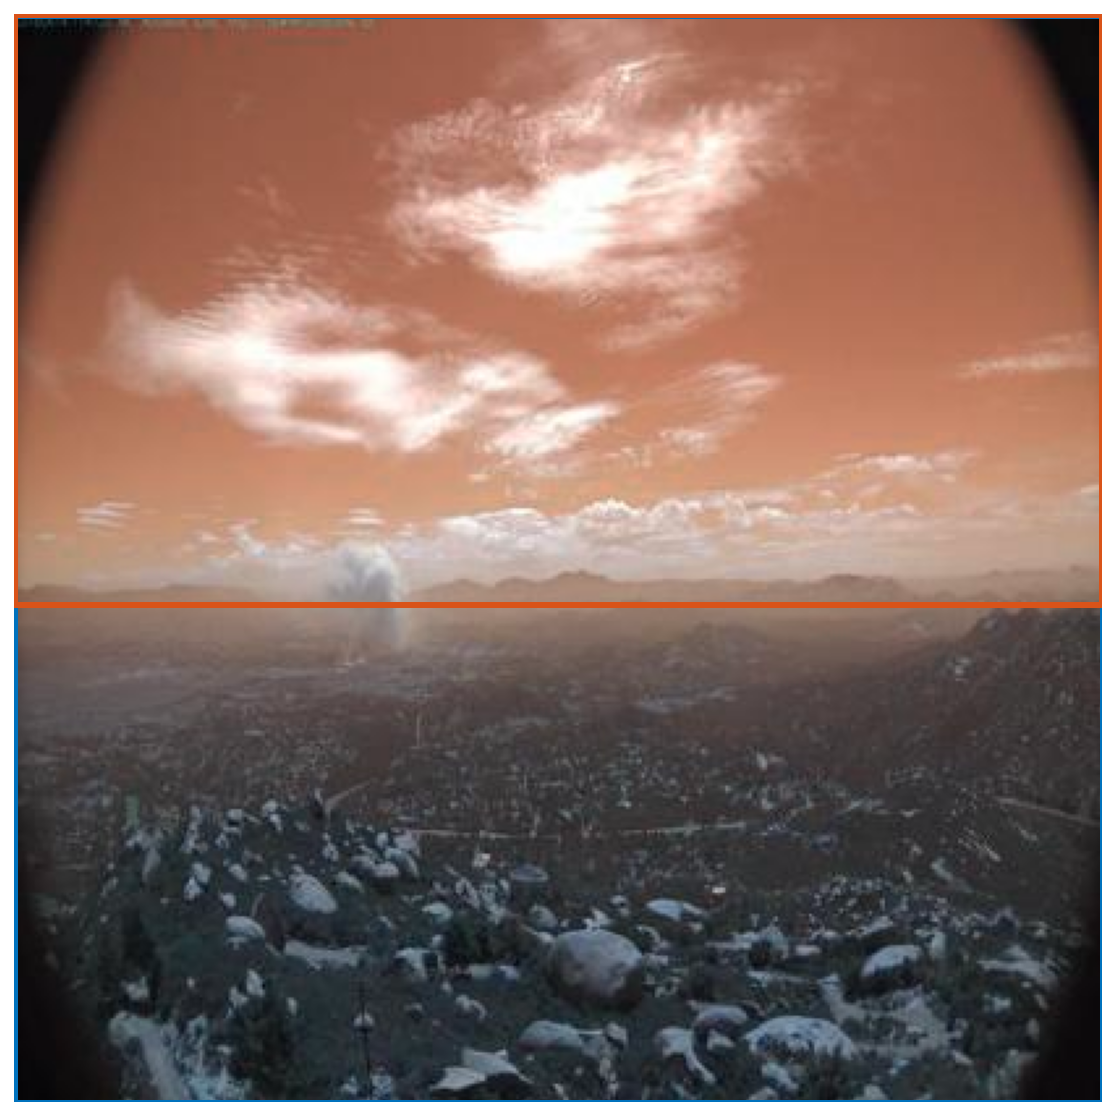

In [ ]:
plot_results(pil_img, probas[keep], bboxes_scaled)

['/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0t1ywwdmqkf0944mhiw5huk_jpeg_jpg.rf.43dc6e3cc5430910e492531e968977e6.jpg', '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0k9jss09oxq0721c8pd7eds_jpeg_jpg.rf.7b39624fb487085f17ae10f5a2392d6d.jpg', '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0kfljfp7vuk09441308dug1_jpeg_jpg.rf.822eae9661e13db1e65365937bbd643a.jpg', '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0m1m206hgy907944qxlvo5i_jpeg_jpg.rf.a357d895d865db727c95907cff03886f.jpg', '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0ujle3ouhd20863udrln8yl_jpeg_jpg.rf.3733d4f23c9d81b95195633caeb12969.jpg', '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0u98ba1xzpe0721rgjjjun5_jpeg_jpg.rf.9e9fb2844f4e7394aa055b06ddab88e6.jpg', '/content/drive/MyDrive/FireDetectionProject2

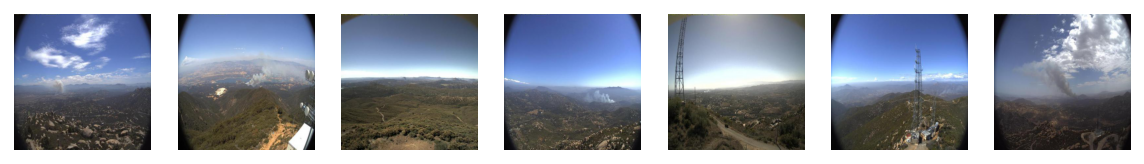

In [ ]:
import os
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showImagesHorizontally(list_of_files):
    
    fig = figure(figsize = (10,8))
    fig.tight_layout(h_pad=-50)
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(1,number_of_files,i+1)
        image = imread(list_of_files[i])
        imshow(image)
        axis('off')

# images=os.listdir('/content/drive/MyDrive/FireDetectionProject2022/detr_qualitative')
# images=[image for image in images if 'jpg' in image]
images = ['/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0t1ywwdmqkf0944mhiw5huk_jpeg_jpg.rf.43dc6e3cc5430910e492531e968977e6.jpg',
          '/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0k9jss09oxq0721c8pd7eds_jpeg_jpg.rf.7b39624fb487085f17ae10f5a2392d6d.jpg',
'/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0kfljfp7vuk09441308dug1_jpeg_jpg.rf.822eae9661e13db1e65365937bbd643a.jpg',
'/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0m1m206hgy907944qxlvo5i_jpeg_jpg.rf.a357d895d865db727c95907cff03886f.jpg',
'/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0ujle3ouhd20863udrln8yl_jpeg_jpg.rf.3733d4f23c9d81b95195633caeb12969.jpg',
'/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0u98ba1xzpe0721rgjjjun5_jpeg_jpg.rf.9e9fb2844f4e7394aa055b06ddab88e6.jpg',
'/content/drive/MyDrive/FireDetectionProject2022/detr-main/detr-main/coco/val2017/ck0ug3zlfw61d09445i888ftl_jpeg_jpg.rf.2d162499cfe5ca67d5234dde87ba8761.jpg']
print(images)
%cd /content/drive/MyDrive/FireDetectionProject2022/detr_qualitative
showImagesHorizontally(images)